# Analysis of results 

In [104]:
cd ~/thesis/

[Errno 2] No such file or directory: '/home/mike/thesis/'
/home/mike/Nextcloud/University/Thesis/code_source


/home/mike/.local/lib/python3.10/site-packages/IPython/core/magics/osm.py:393: UserWarning: This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})


## Initial processing

In [120]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [106]:
results_df = pd.read_csv('results.csv')

In [107]:
results_df.head(10)

,dataset,nodes,edges,retraining_type,metric,10%,20%,30%,40%,50%,60%,70%,80%,90%,parameters,training_time,dynamic_update,num_different_nodes,num_starting_nodes,execution_timestamp
0,cora,2708,5278,global,macro,0.761255,0.761421,0.766579,0.770144,0.768339,0.750144,0.748920,0.726037,0.705966,"(128, 80, 160, 4, 4)",335.403912,prune,512,954,09/06/2024 - 14:03
1,cora,2708,5278,global,micro,0.777273,0.770455,0.770865,0.774744,0.773224,0.762519,0.764629,0.738190,0.728376,"(128, 80, 160, 4, 4)",335.403912,prune,512,954,09/06/2024 - 14:03
2,cora,2708,5278,local,macro,0.719568,0.708577,0.732462,0.728888,0.721512,0.722254,0.699264,0.689976,0.633421,"(128, 80, 160, 4, 4)",22.415920,prune,512,954,09/06/2024 - 14:03
3,cora,2708,5278,local,micro,0.749020,0.731373,0.754248,0.748039,0.734902,0.729412,0.715966,0.705882,0.645752,"(128, 80, 160, 4, 4)",22.415920,prune,512,954,09/06/2024 - 14:03
4,cora,2708,5278,global,macro,0.786469,0.806011,0.817659,0.811031,0.798433,0.800738,0.784838,0.768845,0.741488,"(128, 80, 160, 4, 4)",415.683768,extend,512,512,09/06/2024 - 13:50
5,cora,2708,5278,global,micro,0.793358,0.811808,0.826568,0.821956,0.806499,0.808000,0.794831,0.781726,0.757178,"(128, 80, 160, 4, 4)",415.683768,extend,512,512,09/06/2024 - 13:50
6,cora,2708,5278,local,macro,0.838836,0.825183,0.809946,0.802348,0.794001,0.769331,0.756723,0.746928,0.700615,"(128, 80, 160, 4, 4)",124.809953,extend,512,512,09/06/2024 - 13:50
7,cora,2708,5278,local,micro,0.833948,0.828413,0.817958,0.816421,0.810192,0.792000,0.776899,0.764652,0.728466,"(128, 80, 160, 4, 4)",124.809953,extend,512,512,09/06/2024 - 13:50
8,cora,2708,5278,global,macro,0.776849,0.775327,0.787241,0.769642,0.769258,0.773566,0.763778,0.757239,0.736189,"(128, 80, 160, 4, 2)",339.100999,prune,512,954,09/06/2024 - 13:35
9,cora,2708,5278,global,micro,0.790909,0.781818,0.793627,0.782708,0.779599,0.779970,0.772432,0.767786,0.742033,"(128, 80, 160, 4, 2)",339.100999,prune,512,954,09/06/2024 - 13:35


In [108]:
results_df.size

60240

In [109]:
# These are the parameters for calculating the gloal/local difference
config = {'dataset': 'cora',
          'dynamic_update': 'extend',
          'metric': 'macro',
          'parameters': '(128, 80, 160, 4, 4)',
          'num_different_nodes': 512}

In [110]:
def accu_time_df_gen(results_df, config):
    '''
        Generates DataFrame of accuracy and training time
    '''
    sub_df = results_df.copy()

    for key in config:
        sub_df = sub_df[sub_df.loc[:, key] == config[key]]
        
    sub_df = sub_df.reset_index(drop=True)
    perc_list = ['10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%']
    sub_df = sub_df[['dataset', 'retraining_type', 'parameters'] + perc_list + ['training_time']]

    # Calculate the average accuracy for each row
    accuracy_columns = perc_list
    sub_df['average_accuracy'] = sub_df[accuracy_columns].mean(axis=1)

    sub_df.drop(columns=accuracy_columns, inplace=True)
    columns = [col for col in sub_df.columns if col != 'training_time'] + ['training_time']
    sub_df = sub_df[columns]

    return sub_df

In [111]:
sub_df = accu_time_df_gen(results_df, config)

In [112]:
# Calculate the average accuracy difference
avg_accuracy_diff_perc = 100* (abs(sub_df.loc[0, 'average_accuracy'] - sub_df.loc[1, 'average_accuracy']) / sub_df.loc[0, 'average_accuracy'])

# Calculate the training time difference
training_time_diff_perc = 100* (abs(sub_df.loc[0, 'training_time'] - sub_df.loc[1, 'training_time'])) / sub_df.loc[0, 'training_time']

In [113]:
avg_accuracy_diff_perc, training_time_diff_perc

(1.0062304228615517, 69.97478298432051)

In [114]:
sub_df

,dataset,retraining_type,parameters,average_accuracy,training_time
0,cora,global,"(128, 80, 160, 4, 4)",0.790612,415.683768
1,cora,local,"(128, 80, 160, 4, 4)",0.782657,124.809953


### Hyperparameter tuning

In [116]:
# Should have been 300 (?)
all_parameters = list(results_df['parameters'].unique())
len(all_parameters)

371

In [117]:
sub_df = pd.DataFrame()

for parameters in all_parameters:
    config = {'dataset': 'cora',
              'dynamic_update': 'extend',
              'metric': 'macro',
              'parameters': parameters,
              'num_different_nodes': 512}
    
    sub_df = pd.concat([sub_df, accu_time_df_gen(results_df, config)])

sub_df = sub_df.reset_index(drop=True)
    

In [118]:
sub_df

,dataset,retraining_type,parameters,average_accuracy,training_time
0,cora,global,"(128, 80, 160, 4, 4)",0.790612,415.683768
1,cora,local,"(128, 80, 160, 4, 4)",0.782657,124.809953
2,cora,global,"(128, 80, 160, 4, 2)",0.788929,415.153521
3,cora,local,"(128, 80, 160, 4, 2)",0.798554,123.297439
4,cora,global,"(128, 80, 160, 4, 1)",0.801734,418.863538
...,...,...,...,...,...
199,cora,local,"(128, 40, 80, 0.25, 0.25)",0.812863,31.953484
200,cora,global,"[64, 8, 8, 0.25, 4]",0.719772,3.050927
201,cora,local,"[64, 8, 8, 0.25, 4]",0.663561,2.501036
202,cora,global,"[64, 8, 8, 0.25, 4]",0.731451,2.913603


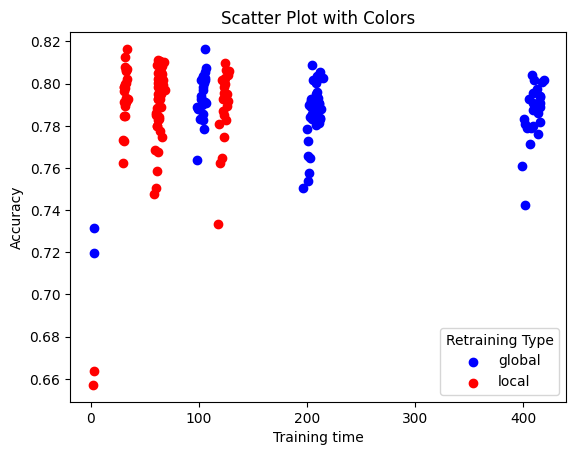

In [129]:
# Map colors
colors = sub_df['retraining_type'].map({'global': 'blue', 'local': 'red'})

# Scatter plot for each category
for retraining_type, color in {'global': 'blue', 'local': 'red'}.items():
    subset = sub_df[sub_df['retraining_type'] == retraining_type]
    plt.scatter(subset['training_time'], subset['average_accuracy'], c=color, label=retraining_type)

plt.xlabel('Training time')
plt.ylabel('Accuracy')
plt.title('Scatter Plot with Colors')
plt.legend(title='Retraining Type')
plt.show()

In [87]:
sub_df = sub_df[sub_df.loc[:, 'retraining_type'] == 'global'].reset_index(drop=True)
sub_df

,dataset,retraining_type,parameters,average_accuracy,training_time
0,cora,global,"(128, 80, 160, 4, 4)",0.790612,415.683768
1,cora,global,"(128, 80, 160, 4, 2)",0.788929,415.153521
2,cora,global,"(128, 80, 160, 4, 1)",0.801734,418.863538
3,cora,global,"(128, 80, 160, 4, 0.5)",0.794018,415.609461
4,cora,global,"(128, 80, 160, 4, 0.25)",0.786182,413.349500
...,...,...,...,...,...
97,cora,global,"(128, 40, 80, 0.25, 1)",0.794214,102.186127
98,cora,global,"(128, 40, 80, 0.25, 0.5)",0.801563,101.718036
99,cora,global,"(128, 40, 80, 0.25, 0.25)",0.790095,103.087805
100,cora,global,"[64, 8, 8, 0.25, 4]",0.719772,3.050927


In [88]:
sub_df['average_accuracy'].argmax()

76

In [89]:
sub_df.iloc[sub_df['average_accuracy'].argmax()]

dataset                            cora
retraining_type                  global
parameters          (128, 40, 80, 4, 2)
average_accuracy               0.816394
training_time                105.576616
Name: 76, dtype: object

## Graphs 